**Import Required Libraries**

In [1]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam

**Load Dataset**

In [18]:
df=pd.read_csv('/content/mobile_price_classification.csv')

**Exploratory Data Analysis(EDA)**

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [21]:
df.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [22]:
df['price_range'].unique()#target

array([1, 2, 3, 0])

In [23]:
df['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


In [24]:
df['price_range'].nunique()

4

In [25]:
df.isnull().sum()

,0
battery_power,0
bluetooth,0
clock_speed,0
dual_sim,0
front_cam,0
4G,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


**Visualization**

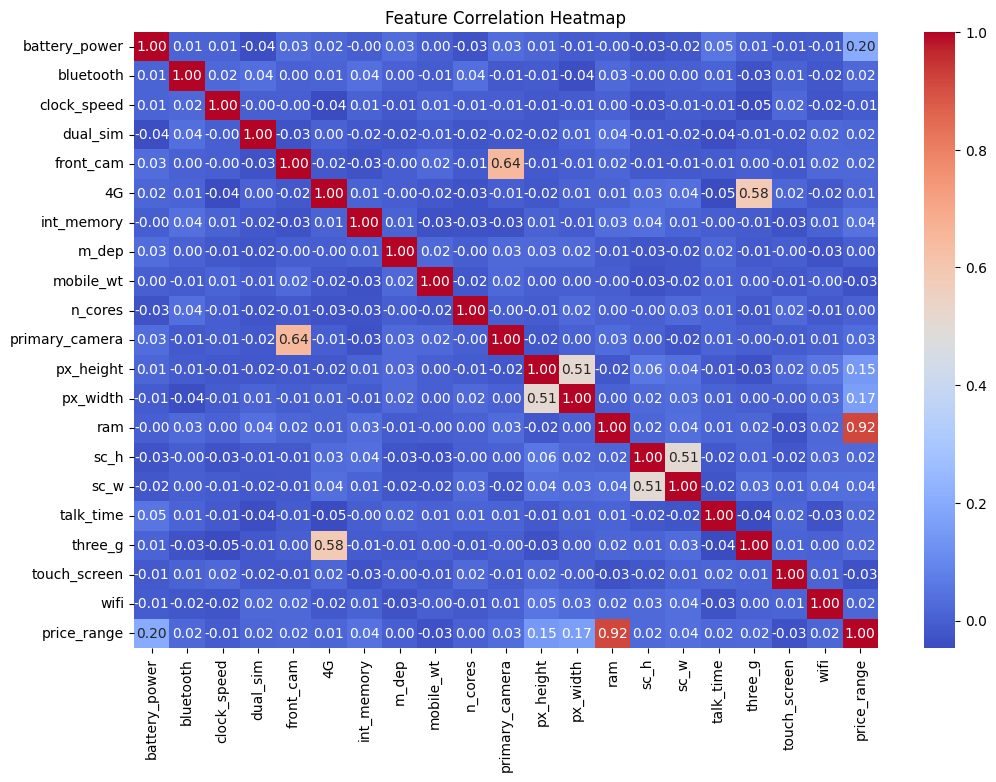

In [26]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**Split Features and Target**

In [27]:
X = df.drop('price_range', axis=1)
y = df['price_range']

**Feature Scaling**

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Train Test Split**

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Define build_model() for tuner**

In [30]:
def build_model(hp):
    model = Sequential()

    # Number of hidden layers (1–3)
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(
            units=hp.Choice(f'units_{i}', [32, 64, 128]),
            activation=hp.Choice('activation', ['relu', 'tanh'])
        ))
        model.add(Dropout(rate=hp.Choice('dropout', [0.0, 0.2, 0.3])))

    # Output layer for 4-class classification
    model.add(Dense(4, activation='softmax'))

    # Optimizer and learning rate
    optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
    lr = hp.Choice('lr', [0.01, 0.001, 0.0001])

    if optimizer_choice == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer_choice == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)

    # Compile classification model
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [31]:
# Initialize tuner

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15,             # number of combinations to try
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='mobile_price_classification'
)

In [32]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
units_0 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Choice)
{'default': 0.0, 'conditions': [], 'values': [0.0, 0.2, 0.3], 'ordered': True}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd', 'rmsprop'], 'ordered': False}
lr (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


**Run hyperparameter search**

In [33]:
tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Trial 15 Complete [00h 00m 21s]
val_accuracy: 0.5350000262260437

Best val_accuracy So Far: 0.8374999761581421
Total elapsed time: 00h 04m 14s


In [34]:
# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [35]:
print(" Best Hyperparameters:")
print(best_hps.values)

 Best Hyperparameters:
{'num_layers': 3, 'units_0': 128, 'activation': 'relu', 'dropout': 0.0, 'optimizer': 'adam', 'lr': 0.01, 'units_1': 128, 'units_2': 64}


**Retrain best model**

In [36]:
history = best_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6399 - loss: 1.0539 - val_accuracy: 0.7675 - val_loss: 0.4908
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7844 - loss: 0.5140 - val_accuracy: 0.8175 - val_loss: 0.4618
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7784 - loss: 0.4924 - val_accuracy: 0.7875 - val_loss: 0.4827
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7866 - loss: 0.4821 - val_accuracy: 0.8500 - val_loss: 0.3781
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8382 - loss: 0.4008 - val_accuracy: 0.8500 - val_loss: 0.3988
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8195 - loss: 0.4045 - val_accuracy: 0.8375 - val_loss: 0.4135
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8275 - loss: 0.4122 - val_accuracy: 0.8325 - val_loss: 0.3799
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8375 - loss: 0.3977 - val_accuracy: 0.8650 - val_loss

**Evaluate model**

In [38]:
test_loss, test_acc = best_model.evaluate(X_val, y_val, verbose=0)
print(f" Test Accuracy: {test_acc:.4f}")

 Test Accuracy: 0.9025


In [39]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


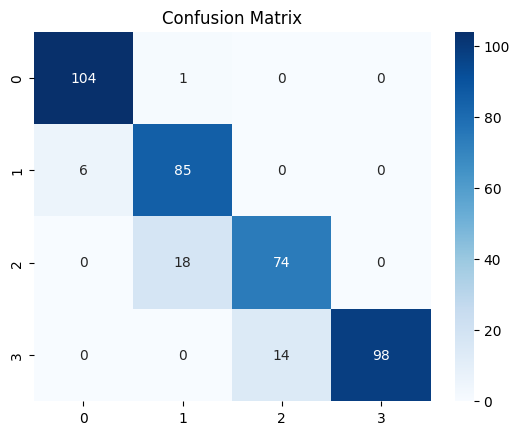


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       105
           1       0.82      0.93      0.87        91
           2       0.84      0.80      0.82        92
           3       1.00      0.88      0.93       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.90      0.90       400



In [40]:
y_pred = np.argmax(best_model.predict(X_val), axis=1)
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:\n", classification_report(y_val, y_pred))

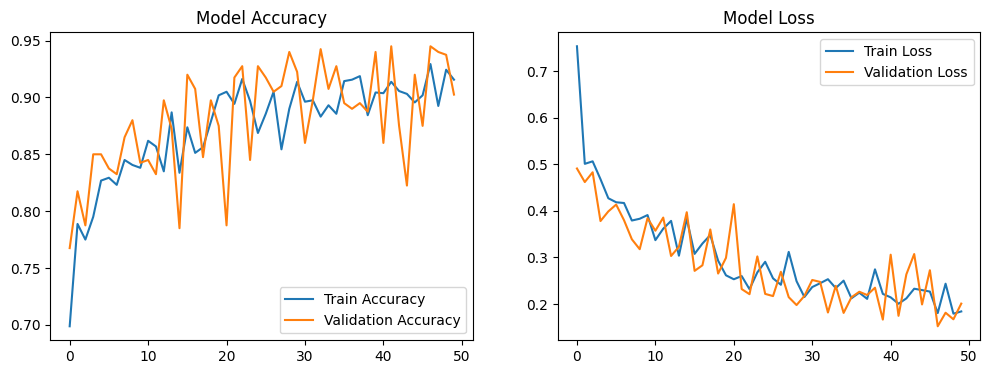

In [41]:
# Plot training history

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(); plt.title("Model Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(); plt.title("Model Loss")

plt.show()